In [1]:
# scikit-learn k-fold cross-valida0on
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
dataset = pandas.read_csv('datasets/housing1.csv')
print(dataset.shape)

(505, 14)


In [2]:
X = dataset.iloc[:, [0, 12]]
y = dataset.iloc[:, 13]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
scores = []
best_svr = SVR(kernel='rbf')
cv = KFold(n_splits=10)
for train_index, test_index in cv.split(X):
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],y[train_index], y[test_index]
    best_svr.fit(X_train, y_train)
    scores.append(best_svr.score(X_test, y_test))
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.7210277979554574, 0.43608160512132965, 0.47462710733612523, -0.043293812153293976, 0.26554580597058397, -0.2444895616374434, -0.4593646569835139, 0.5026491712713788, 0.05656276571134289, 0.21748568558340342]
0.192683190817537
0.347906100102407


### Grid search 

In [3]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("datasets/wineQualityReds.csv", sep=',')
dataset.head()
X = dataset.iloc[:, 0:11].values
y = dataset.iloc[:, 11].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=300, random_state=0)

from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=5)
print(all_accuracies)

grid_param = {
    'n_estimators': [100, 300, 500, 800, 1000],
    'max_depth': [1, 2, 3],
    'bootstrap': [True, False],
    'min_samples_split': [2, 5, 10]
}

from sklearn.model_selection import GridSearchCV
gd_sr = GridSearchCV(estimator=regressor, param_grid=grid_param, scoring='r2', cv=5, n_jobs=-1)


[0.33526631 0.42301772 0.45014145 0.51503344 0.53573979]


In [5]:
gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 1000}
0.3507186009865155


In [6]:
import warnings
warnings.filterwarnings("ignore")


### validation Curves

[ 1  2  3  4  5  6  7  8  9 10]
[1.         0.99137478 0.99360048 0.9920701  0.99081826 0.98970493
 0.98998348 0.98859217 0.98789657 0.98664415]


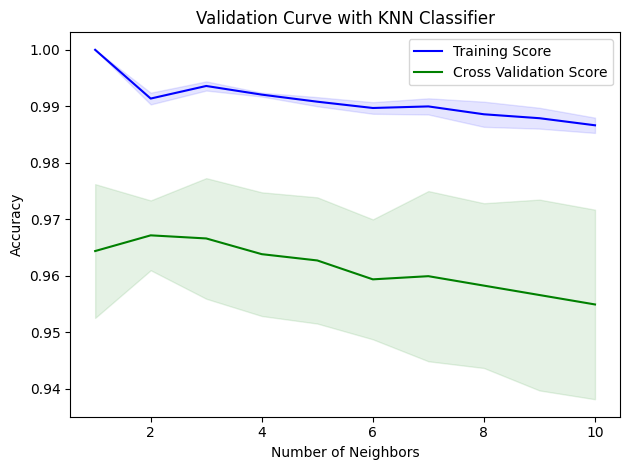

In [7]:
%matplotlib inline
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve

# Loading dataset
dataset = load_digits()
# X contains the data and y contains the labels
X, y = dataset.data, dataset.target

# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 11, 1)  # Range from 1 to 10
print(parameter_range)

# Calculate accuracy on training and test set using KNN with 5-fold cross-validation
train_score, test_score = validation_curve(
    KNeighborsClassifier(),
    X,  # Your feature matrix
    y,  # Your target variable
    param_name="n_neighbors",
    param_range=parameter_range,
    cv=5,
    scoring="accuracy"
)

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis=1)
print(mean_train_score)
std_train_score = np.std(train_score, axis=1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis=1)
std_test_score = np.std(test_score, axis=1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score, label="Training Score", color='b')
plt.plot(parameter_range, mean_test_score, label="Cross Validation Score", color='g')

# Creating the plot
plt.title("Validation Curve with KNN Classifier")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.fill_between(parameter_range, mean_train_score - std_train_score,
                 mean_train_score + std_train_score, color='blue', alpha=0.1)
plt.fill_between(parameter_range, mean_test_score - std_test_score,
                 mean_test_score + std_test_score, color='green', alpha=0.1)
plt.tight_layout()
plt.legend(loc='best')
plt.show()
